In [1]:
from Kramer.database.MongoDB_CRUD import get_all_courses_sync
from rich.console import Console
import chromadb
import dspy
import os

In [2]:
print("Getting courses...")
courses = get_all_courses_sync()
trainset = []
for course in courses:
    try:
        topic = course.course_title
        intro_video = course.sections[0].entries[0].transcript
        trainset.append(dspy.Example(topic=topic, intro_video=intro_video))
    except:
        pass
print(f"Got {len(trainset)} courses.")
trainset = [x.with_inputs("topic", "intro_video") for x in trainset]
print(len(trainset))

Getting courses...
Got 11008 courses.
11008


In [3]:
# Set up the console for pretty printing
console = Console(width=100)
# Set up the OpenAI API key and instantiate the GPT-4o model
api_key = os.getenv("OPENAI_API_KEY")
# lm = dspy.LM("ollama_chat/llama3.1", api_base="http://localhost:11434", api_key="")
# lm = dspy.LM("ollama_chat/llama3.1", api_base="http://localhost:11434", api_key="")
lm = dspy.LM("openai/gpt-4o-mini", api_key=api_key)
dspy.configure(lm=lm)

In [4]:
class WriteVideoTranscript(dspy.Signature):
    """Write a video transcript for the intro video to a course on a given topic."""

    topic: str = dspy.InputField(desc="the topic of the course")
    intro_video: str = dspy.OutputField(
        desc="markdown-formatted transcript of an intro video of roughly 250 words"
    )

In [13]:
def get_similarity_score(original_text: str, generated_text: str):
    """
    Get the similarity score between two texts.
    """
    if not isinstance(original_text, str):
        return None
    if not isinstance(generated_text, str):
        return None
    # Initialize ChromaDB client
    client = chromadb.Client()

    # Create a collection
    try:
        collection = client.get_collection("similarity_test")
    except chromadb.errors.InvalidCollectionException:
        collection = client.create_collection("similarity_test")

    # Add your documents
    try:
        collection.add(
            documents=[original_text, generated_text], ids=["original", "generated"]
        )
    except:
        print("Error adding document for whatever reason.")

    # Query to get similarity
    results = collection.query(
        query_texts=[original_text], n_results=2, include=["distances"]
    )

    # The distances in the results represent similarity scores
    # Lower distance = higher similarity
    similarity_score = results["distances"][0][1]
    if not isinstance(similarity_score, float):
        raise ValueError("Similarity score is not a float.")
    return similarity_score

In [28]:
write_video_transcript = dspy.ChainOfThought(WriteVideoTranscript)

In [ ]:
# Plot the data
# import pandas as pd
# import matplotlib.pyplot as plt
# scores = [s for s in scores if s is not None]
# s=pd.Series(scores)
# mean = sum(scores) / len(scores)
# print(mean)
# # Histogram
# s.hist(bins=30)  # you can adjust number of bins as needed
# plt.title('Distribution of Similarity Scores')
# plt.xlabel('Similarity Score')
# plt.ylabel('Frequency')
# plt.show()
# # plt.scatter(s.index, s.values, alpha = .1)
# s.describe()
# s.to_csv("scores_500.csv", index = False)
"""
count    498.000000
mean       1.719879
std        0.163160
min        0.548691
25%        1.622713
50%        1.728114
75%        1.837510
max        2.147124
"""

In [22]:
def metric(example, pred, trace=None):
    topic, intro_video, transcript = (
        example.topic,
        example.intro_video,
        pred.intro_video,
    )
    
    similarity_score = get_similarity_score(intro_video, transcript)
    try:
        verdict = similarity_score >= 1.9
        return verdict
    except:
        return None

In [23]:
scores = []
n = 200
for index, x in enumerate(trainset[:n]):
    print(f"Evaluating {index+1} out of {n}")
    pred = write_video_transcript(**x.inputs())
    score = metric(x, pred)
    scores.append(score)

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 1 out of 200
Evaluating 2 out of 200
Evaluating 3 out of 200
Evaluating 4 out of 200
Evaluating 5 out of 200
Evaluating 6 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 7 out of 200
Evaluating 8 out of 200
Evaluating 9 out of 200
Evaluating 10 out of 200
Evaluating 11 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 12 out of 200
Evaluating 13 out of 200
Evaluating 14 out of 200
Evaluating 15 out of 200
Evaluating 16 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 17 out of 200
Evaluating 18 out of 200
Evaluating 19 out of 200
Evaluating 20 out of 200
Evaluating 21 out of 200
Evaluating 22 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 23 out of 200
Evaluating 24 out of 200
Evaluating 25 out of 200
Evaluating 26 out of 200
Evaluating 27 out of 200
Evaluating 28 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 29 out of 200
Evaluating 30 out of 200
Evaluating 31 out of 200
Evaluating 32 out of 200
Evaluating 33 out of 200
Evaluating 34 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 35 out of 200
Evaluating 36 out of 200
Evaluating 37 out of 200
Evaluating 38 out of 200
Evaluating 39 out of 200
Evaluating 40 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 41 out of 200
Evaluating 42 out of 200
Evaluating 43 out of 200
Evaluating 44 out of 200
Evaluating 45 out of 200
Evaluating 46 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 47 out of 200
Evaluating 48 out of 200
Evaluating 49 out of 200
Evaluating 50 out of 200
Evaluating 51 out of 200
Evaluating 52 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 53 out of 200
Evaluating 54 out of 200
Evaluating 55 out of 200
Evaluating 56 out of 200
Evaluating 57 out of 200
Evaluating 58 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 59 out of 200
Evaluating 60 out of 200
Evaluating 61 out of 200
Evaluating 62 out of 200
Evaluating 63 out of 200
Evaluating 64 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 65 out of 200
Evaluating 66 out of 200
Evaluating 67 out of 200
Evaluating 68 out of 200
Evaluating 69 out of 200
Evaluating 70 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 71 out of 200
Evaluating 72 out of 200
Evaluating 73 out of 200
Evaluating 74 out of 200
Evaluating 75 out of 200
Evaluating 76 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 77 out of 200
Evaluating 78 out of 200
Evaluating 79 out of 200
Evaluating 80 out of 200
Evaluating 81 out of 200
Evaluating 82 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 83 out of 200
Evaluating 84 out of 200
Evaluating 85 out of 200
Evaluating 86 out of 200
Evaluating 87 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 88 out of 200
Evaluating 89 out of 200
Evaluating 90 out of 200
Evaluating 91 out of 200
Evaluating 92 out of 200
Evaluating 93 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 94 out of 200
Evaluating 95 out of 200
Evaluating 96 out of 200
Evaluating 97 out of 200
Evaluating 98 out of 200
Evaluating 99 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 100 out of 200
Evaluating 101 out of 200
Evaluating 102 out of 200
Evaluating 103 out of 200
Evaluating 104 out of 200
Evaluating 105 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 106 out of 200
Evaluating 107 out of 200
Evaluating 108 out of 200
Evaluating 109 out of 200
Evaluating 110 out of 200
Evaluating 111 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 112 out of 200
Evaluating 113 out of 200
Evaluating 114 out of 200
Evaluating 115 out of 200
Evaluating 116 out of 200
Evaluating 117 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 118 out of 200
Evaluating 119 out of 200
Evaluating 120 out of 200
Evaluating 121 out of 200
Evaluating 122 out of 200
Evaluating 123 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 124 out of 200
Evaluating 125 out of 200
Evaluating 126 out of 200
Evaluating 127 out of 200
Evaluating 128 out of 200
Evaluating 129 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 130 out of 200
Evaluating 131 out of 200
Evaluating 132 out of 200
Evaluating 133 out of 200
Evaluating 134 out of 200
Evaluating 135 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 136 out of 200
Evaluating 137 out of 200
Evaluating 138 out of 200
Evaluating 139 out of 200
Evaluating 140 out of 200
Evaluating 141 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 142 out of 200
Evaluating 143 out of 200
Evaluating 144 out of 200
Evaluating 145 out of 200
Evaluating 146 out of 200
Evaluating 147 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 148 out of 200
Evaluating 149 out of 200
Evaluating 150 out of 200
Evaluating 151 out of 200
Evaluating 152 out of 200
Evaluating 153 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 154 out of 200
Evaluating 155 out of 200
Evaluating 156 out of 200
Evaluating 157 out of 200
Evaluating 158 out of 200
Evaluating 159 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 160 out of 200
Evaluating 161 out of 200
Evaluating 162 out of 200
Evaluating 163 out of 200
Evaluating 164 out of 200
Evaluating 165 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 166 out of 200
Evaluating 167 out of 200
Evaluating 168 out of 200
Evaluating 169 out of 200
Evaluating 170 out of 200
Evaluating 171 out of 200
Evaluating 172 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 173 out of 200
Evaluating 174 out of 200
Evaluating 175 out of 200
Evaluating 176 out of 200
Evaluating 177 out of 200
Evaluating 178 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 179 out of 200
Evaluating 180 out of 200
Evaluating 181 out of 200
Evaluating 182 out of 200
Evaluating 183 out of 200
Evaluating 184 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 185 out of 200
Evaluating 186 out of 200
Evaluating 187 out of 200
Evaluating 188 out of 200
Evaluating 189 out of 200
Evaluating 190 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 191 out of 200
Evaluating 192 out of 200
Evaluating 193 out of 200
Evaluating 194 out of 200
Evaluating 195 out of 200
Evaluating 196 out of 200


Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Evaluating 197 out of 200
Evaluating 198 out of 200
Evaluating 199 out of 200
Evaluating 200 out of 200


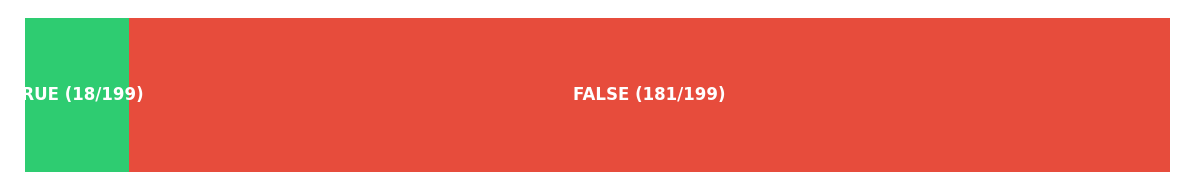

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_bool_list(bool_list):
    # Calculate proportions
    total = len(bool_list)
    true_count = sum(bool_list)
    proportions = [true_count/total, (total-true_count)/total]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 2))
    
    # Create horizontal bar
    ax.barh(0, proportions[0], color='#2ecc71', label=f'True ({true_count})')
    ax.barh(0, proportions[1], left=proportions[0], color='#e74c3c', label=f'False ({total-true_count})')
    
    # Customize appearance
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_xlim(0, 1)  # Set x-axis limits
    
    # Remove all spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add percentage labels
    ax.text(proportions[0]/2, 0, f'TRUE ({true_count}/{total})', 
            ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(proportions[0] + proportions[1]/2, 0, f'FALSE ({total-true_count}/{total})',
            ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Example usage:
scores = [s for s in scores if s is not None]
bool_list = scores
visualize_bool_list(bool_list)

In [25]:
teleprompter = dspy.MIPROv2(metric=metric, num_threads=24, verbose=True)
# Train the model
optimized_program = teleprompter.compile(write_video_transcript, trainset=trainset)

Projected Language Model (LM) Calls

Based on the parameters you have set, the maximum number of LM calls is projected as follows:

- Prompt Generation: 10 data summarizer calls + 10 * 1 lm calls in program + (2) lm calls in program-aware proposer = 22 prompt model calls
- Program Evaluation: 25 examples in minibatch * 30 batches + 1000 examples in val set * 4 full evals = 4750 LM Program calls

Estimated Cost Calculation:

Total Cost = (Number of calls to task model * (Avg Input Token Length per Call * Task Model Price per Input Token + Avg Output Token Length per Call * Task Model Price per Output Token) 
            + (Number of program calls * (Avg Input Token Length per Call * Task Prompt Price per Input Token + Avg Output Token Length per Call * Prompt Model Price per Output Token).

For a preliminary estimate of potential costs, we recommend you perform your own calculations based on the task
and prompt models you intend to use. If the projected costs exceed your budget or expec

2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: These will be used as few-shot example candidates for our program and for creating instructions.

2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: Bootstrapping N=10 sets of demonstrations...


Bootstrapping set 1/10
Bootstrapping set 2/10
Bootstrapping set 3/10


  0%|                                                                                                                             | 0/10008 [00:00<?, ?it/s]Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
  0%|                                                                                                                     | 1/10008 [00:00<15:14, 10.94it/s]
2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: Error generating few-shot examples: dspy.primitives.example.Example() got multiple values for keyword argument 'intro_video'
2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: Running without few-shot examples.
2025/01/11 16:59:00 INFO dspy.teleprompt.mipro_optimizer_v2: 
==> STEP 2: PRO

SOURCE CODE: StringSignature(topic -> reasoning, intro_video
    instructions='Write a video transcript for the intro video to a course on a given topic.'
    topic = Field(annotation=str required=True json_schema_extra={'desc': 'the topic of the course', '__dspy_field_type': 'input', 'prefix': 'Topic:'})
    reasoning = Field(annotation=str required=True json_schema_extra={'prefix': "Reasoning: Let's think step by step in order to", 'desc': '${reasoning}', '__dspy_field_type': 'output'})
    intro_video = Field(annotation=str required=True json_schema_extra={'desc': 'markdown-formatted transcript of an intro video of roughly 250 words', '__dspy_field_type': 'output', 'prefix': 'Intro Video:'})
)




DATA SUMMARY: The dataset reveals a strong focus on nurturing both technical and soft skills essential for success in technology and design fields, with instructors frequently utilizing personal anecdotes to enhance relatability and engagement. There is a notable emphasis on real-world app

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original


Average Metric: 0.00 / 1 (0.0%):   0%|                                                                                     | 1/1000 [00:00<02:29,  6.70it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing 

Average Metric: 0.00 / 3 (0.0%):   0%|▏                                                                                    | 2/1000 [00:00<03:03,  5.44it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original


Average Metric: 0.00 / 4 (0.0%):   0%|▎                                                                                    | 3/1000 [00:00<03:03,  5.44it/s]

Add of existing embedding ID: generated


Average Metric: 0.00 / 4 (0.0%):   0%|▎                                                                                    | 4/1000 [00:00<01:40,  9.94it/s]

Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 8 (0.0%):   1%|▌                                                                                    | 7/1000 [00:00<01:39,  9.94it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 9 (0.0%):   1%|▋                                                                                    | 8/1000 [00:00<01:39,  9.94it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 11 (0.0%):   1%|▊                                                                                  | 10/1000 [00:00<01:39,  9.94it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 12 (0.0%):   1%|▉                                                                                  | 11/1000 [00:00<01:39,  9.94it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 13 (0.0%):   1%|█                                                                                  | 13/1000 [00:00<00:30, 32.29it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 14 (0.0%):   1%|█                                                                                  | 13/1000 [00:00<00:30, 32.29it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 18 (0.0%):   2%|█▍                                                                                 | 17/1000 [00:00<00:30, 32.29it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 19 (0.0%):   2%|█▍                                                                                 | 18/1000 [00:00<00:30, 32.29it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 26 (0.0%):   2%|██                                                                                 | 25/1000 [00:00<00:17, 54.28it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 0.00 / 27 (0.0%):   3%|██▏                                                                                | 26/1000 [00:00<00:17, 54.28it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 28 (0.0%):   3%|██▏                                                                                | 27/1000 [00:01<00:17, 54.28it/s]

Add of existing embedding ID: original


Average Metric: 1.00 / 29 (3.4%):   3%|██▎                                                                                | 28/1000 [00:01<00:17, 54.28it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 31 (3.2%):   3%|██▌                                                                                | 31/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 32 (3.1%):   3%|██▌                                                                                | 31/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 36 (2.8%):   4%|██▉                                                                                | 35/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 37 (2.7%):   4%|██▉                                                                                | 36/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 38 (2.6%):   4%|███                                                                                | 37/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 39 (2.6%):   4%|███▏                                                                               | 38/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 41 (2.4%):   4%|███▎                                                                               | 40/1000 [00:01<00:29, 32.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 45 (2.2%):   4%|███▋                                                                               | 44/1000 [00:01<00:20, 46.31it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 50 (2.0%):   5%|████▏                                                                              | 50/1000 [00:01<00:17, 52.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 1.00 / 51 (2.0%):   5%|████▏                                                                              | 50/1000 [00:01<00:17, 52.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 52 (1.9%):   5%|████▏                                                                              | 51/1000 [00:01<00:17, 52.96it/s]

Add of existing embedding ID: original


Average Metric: 1.00 / 53 (1.9%):   5%|████▎                                                                              | 52/1000 [00:01<00:17, 52.96it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing 

Average Metric: 1.00 / 53 (1.9%):   5%|████▍                                                                              | 53/1000 [00:19<00:17, 52.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
Average Metric: 1.00 / 53 (1.9%):   5%|████▍                                                                              | 53/1000 [02:01<36:16,  2.30s/it]

2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Default program score: 0.0

2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: ==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

/home/bianders/Brian_Code/.Magnus/lib/python3.12/site-packages/optuna/_experimental.py:31: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 1 / 30 ==
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1'].
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0]
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 2 / 30 ==
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0]
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 3 / 30 ==
2025/01/11 17:01:02 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 words and formatted in markdown.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6'].
2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 4 / 30 ==
2025/01/11 17:01:03 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 5 / 30 ==
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8'].
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 6 / 30 ==
2025/01/11 17:01:04 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 words and formatted in markdown.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6'].
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 7 / 30 ==
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Craft an engaging and informative video transcript for the introductory segment of a course on the specified topic. The transcript should be around 250 words and include a compelling reasoning statement that outlines the importance and relevance of the topic in today's technology and design landscape. Use a conversational tone and personal anecdotes to enhance relatability, while ensuring the content encourages actionable insights and ethical considerations.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4'].
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 8 / 30 ==
2025/01/11 17:01:05 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Craft an engaging and informative video transcript for the introductory segment of a course on the specified topic. The transcript should be around 250 words and include a compelling reasoning statement that outlines the importance and relevance of the topic in today's technology and design landscape. Use a conversational tone and personal anecdotes to enhance relatability, while ensuring the content encourages actionable insights and ethical considerations.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5'].
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 9 / 30 ==
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3'].
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: ============================


2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 10 / 30 ==
2025/01/11 17:01:06 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 8'].
2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0]
2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 1 =====
2025/01/11 17:01:07 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 0.0) from minibatch trials...


Add of existing embedding ID: original


  0%|                                                                                                                              | 0/1000 [00:00<?, ?it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 1 (0.0%):   0%|                                                                                             | 0/1000 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 2 (0.0%):   0%|▏                                                                                    | 2/1000 [00:06<50:52,  3.06s/it]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 3 (0.0%):   0%|▏                                                                                    | 2/1000 [00:06<50:52,  3.06s/it]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 4 (0.0%):   0%|▎                                                                                    | 3/1000 [00:06<50:49,  3.06s/it]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 5 (0.0%):   0%|▍                                                                                    | 5/1000 [00:06<16:34,  1.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 6 (0.0%):   0%|▍                                                                                    | 5/1000 [00:06<16:34,  1.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 9 (0.0%):   1%|▋                                                                                    | 8/1000 [00:06<10:26,  1.58it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 10 (0.0%):   1%|▊                                                                                  | 10/1000 [00:06<05:57,  2.77it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 11 (0.0%):   1%|▊                                                                                  | 10/1000 [00:06<05:57,  2.77it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 14 (0.0%):   1%|█                                                                                  | 13/1000 [00:07<05:29,  3.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 15 (0.0%):   1%|█▏                                                                                 | 14/1000 [00:07<05:28,  3.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 16 (0.0%):   2%|█▎                                                                                 | 16/1000 [00:07<03:14,  5.07it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 17 (0.0%):   2%|█▎                                                                                 | 16/1000 [00:07<03:14,  5.07it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 18 (0.0%):   2%|█▍                                                                                 | 18/1000 [00:07<03:08,  5.21it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 20 (0.0%):   2%|█▌                                                                                 | 19/1000 [00:07<03:08,  5.21it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 21 (0.0%):   2%|█▋                                                                                 | 21/1000 [00:07<02:25,  6.73it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 22 (0.0%):   2%|█▋                                                                                 | 21/1000 [00:07<02:25,  6.73it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 24 (0.0%):   2%|█▉                                                                                 | 23/1000 [00:08<02:21,  6.90it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 25 (0.0%):   2%|█▉                                                                                 | 24/1000 [00:08<02:21,  6.90it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 26 (0.0%):   3%|██▏                                                                                | 26/1000 [00:08<01:56,  8.33it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 27 (0.0%):   3%|██▏                                                                                | 26/1000 [00:08<01:56,  8.33it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 28 (0.0%):   3%|██▎                                                                                | 28/1000 [00:11<08:17,  1.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 29 (0.0%):   3%|██▎                                                                                | 28/1000 [00:11<08:17,  1.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 30 (0.0%):   3%|██▍                                                                                | 29/1000 [00:11<08:17,  1.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 31 (0.0%):   3%|██▌                                                                                | 31/1000 [00:11<05:41,  2.84it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 32 (0.0%):   3%|██▌                                                                                | 31/1000 [00:12<05:41,  2.84it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 33 (0.0%):   3%|██▋                                                                                | 33/1000 [00:12<05:54,  2.73it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 34 (2.9%):   3%|██▋                                                                                | 33/1000 [00:12<05:54,  2.73it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 35 (2.9%):   3%|██▊                                                                                | 34/1000 [00:12<05:53,  2.73it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 36 (2.8%):   4%|██▉                                                                                | 36/1000 [00:12<04:07,  3.90it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 37 (2.7%):   4%|██▉                                                                                | 36/1000 [00:13<04:07,  3.90it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 38 (2.6%):   4%|███▏                                                                               | 38/1000 [00:13<04:09,  3.85it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 39 (2.6%):   4%|███▏                                                                               | 38/1000 [00:13<04:09,  3.85it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 40 (2.5%):   4%|███▎                                                                               | 40/1000 [00:13<04:06,  3.89it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 41 (2.4%):   4%|███▎                                                                               | 40/1000 [00:13<04:06,  3.89it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 42 (2.4%):   4%|███▍                                                                               | 42/1000 [00:13<03:12,  4.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 43 (2.3%):   4%|███▍                                                                               | 42/1000 [00:13<03:12,  4.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 44 (2.3%):   4%|███▌                                                                               | 43/1000 [00:13<03:12,  4.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 46 (2.2%):   4%|███▋                                                                               | 45/1000 [00:14<02:17,  6.93it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 47 (2.1%):   5%|███▉                                                                               | 47/1000 [00:14<02:21,  6.75it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 48 (2.1%):   5%|███▉                                                                               | 47/1000 [00:14<02:21,  6.75it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 49 (2.0%):   5%|████                                                                               | 49/1000 [00:15<03:46,  4.21it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 50 (2.0%):   5%|████                                                                               | 49/1000 [00:15<03:46,  4.21it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 51 (2.0%):   5%|████▏                                                                              | 51/1000 [00:15<04:01,  3.93it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 52 (1.9%):   5%|████▎                                                                              | 52/1000 [00:16<03:45,  4.20it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 53 (1.9%):   5%|████▍                                                                              | 53/1000 [00:16<03:36,  4.37it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 54 (1.9%):   5%|████▍                                                                              | 54/1000 [00:16<04:38,  3.39it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 55 (1.8%):   6%|████▌                                                                              | 55/1000 [00:16<04:09,  3.79it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 56 (1.8%):   6%|████▌                                                                              | 55/1000 [00:16<04:09,  3.79it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 57 (1.8%):   6%|████▋                                                                              | 57/1000 [00:17<03:08,  4.99it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 58 (1.7%):   6%|████▊                                                                              | 58/1000 [00:17<03:05,  5.07it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 59 (1.7%):   6%|████▉                                                                              | 59/1000 [00:17<04:13,  3.71it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 60 (1.7%):   6%|████▉                                                                              | 59/1000 [00:17<04:13,  3.71it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 61 (1.6%):   6%|████▉                                                                              | 60/1000 [00:17<04:13,  3.71it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 62 (1.6%):   6%|█████▏                                                                             | 62/1000 [00:18<02:37,  5.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 63 (1.6%):   6%|█████▏                                                                             | 63/1000 [00:18<03:06,  5.03it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 64 (1.6%):   6%|█████▏                                                                             | 63/1000 [00:18<03:06,  5.03it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 65 (1.5%):   6%|█████▎                                                                             | 64/1000 [00:18<03:05,  5.03it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 66 (1.5%):   7%|█████▍                                                                             | 66/1000 [00:18<02:00,  7.77it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 67 (1.5%):   7%|█████▍                                                                             | 66/1000 [00:18<02:00,  7.77it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 69 (1.4%):   7%|█████▋                                                                             | 68/1000 [00:18<01:56,  7.99it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 70 (1.4%):   7%|█████▊                                                                             | 70/1000 [00:18<01:43,  9.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 71 (1.4%):   7%|█████▊                                                                             | 70/1000 [00:18<01:43,  9.00it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 73 (1.4%):   7%|█████▉                                                                             | 72/1000 [00:19<02:53,  5.35it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 74 (1.4%):   7%|██████▏                                                                            | 74/1000 [00:20<03:11,  4.84it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 75 (1.3%):   8%|██████▏                                                                            | 75/1000 [00:20<03:22,  4.56it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 76 (1.3%):   8%|██████▎                                                                            | 76/1000 [00:21<04:53,  3.14it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 78 (1.3%):   8%|██████▍                                                                            | 77/1000 [00:21<04:36,  3.33it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 79 (1.3%):   8%|██████▍                                                                            | 78/1000 [00:21<04:36,  3.33it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 80 (1.2%):   8%|██████▋                                                                            | 80/1000 [00:21<03:08,  4.88it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 81 (1.2%):   8%|██████▋                                                                            | 80/1000 [00:21<03:08,  4.88it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 2.00 / 82 (2.4%):   8%|██████▊                                                                            | 82/1000 [00:22<03:05,  4.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 2.00 / 83 (2.4%):   8%|██████▉                                                                            | 83/1000 [00:22<03:02,  5.03it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 2.00 / 84 (2.4%):   8%|██████▉                                                                            | 84/1000 [00:22<02:53,  5.28it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
Average Metric: 2.00 / 84 (2.4%):   8%|██████▉                                                                            | 84/1000 [04:01<43:52,  2.87s/it]

2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 11 / 30 ==
2025/01/11 17:05:08 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1'].
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 12 / 30 ==
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Ensure the transcript is approximately 250 words long, includes a clear explanation of the topic, and outlines the reasoning behind its relevance and applicability in the technology and design fields.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7'].
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 13 / 30 ==
2025/01/11 17:05:09 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Write a video transcript for the intro video to a course on a given topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0'].
2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 14 / 30 ==
2025/01/11 17:05:10 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:06<?, ?it/s]

2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 15 / 30 ==
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1'].
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 16 / 30 ==
2025/01/11 17:05:16 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9'].
2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 17 / 30 ==
2025/01/11 17:05:17 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 18 / 30 ==
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1'].
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 19 / 30 ==
2025/01/11 17:05:18 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 9'].
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 20 / 30 ==
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Write a video transcript for the intro video to a course on a given topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 0'].
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0]
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 2 =====
2025/01/11 17:05:19 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 0.0) from minibatch trials...



  0%|                                                                                                                              | 0/1000 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 1 (0.0%):   0%|                                                                                             | 0/1000 [00:00<?, ?it/s]

Add of existing embedding ID: original


Average Metric: 0.00 / 1 (0.0%):   0%|                                                                                     | 1/1000 [00:00<03:56,  4.22it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing 

Average Metric: 0.00 / 2 (0.0%):   0%|▏                                                                                    | 2/1000 [00:00<04:15,  3.91it/s]

Add of existing embedding ID: original


Average Metric: 0.00 / 3 (0.0%):   0%|▏                                                                                    | 2/1000 [00:00<04:15,  3.91it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 4 (0.0%):   0%|▎                                                                                    | 3/1000 [00:00<04:15,  3.91it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 10 (0.0%):   1%|▊                                                                                   | 9/1000 [00:00<04:13,  3.91it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 13 (0.0%):   1%|▉                                                                                  | 12/1000 [00:00<04:12,  3.91it/s]

Add of existing embedding ID: original


Average Metric: 0.00 / 13 (0.0%):   1%|█                                                                                  | 13/1000 [00:00<00:32, 30.12it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 14 (0.0%):   1%|█                                                                                  | 13/1000 [00:00<00:32, 30.12it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 17 (0.0%):   2%|█▎                                                                                 | 16/1000 [00:00<00:32, 30.12it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 19 (0.0%):   2%|█▍                                                                                 | 18/1000 [00:00<00:32, 30.12it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 25 (0.0%):   2%|█▉                                                                                 | 24/1000 [00:00<00:20, 47.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 0.00 / 26 (0.0%):   2%|██                                                                                 | 25/1000 [00:01<00:20, 47.95it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 28 (0.0%):   3%|██▏                                                                                | 27/1000 [00:01<00:20, 47.95it/s]

Add of existing embedding ID: original


Average Metric: 0.00 / 29 (0.0%):   3%|██▎                                                                                | 28/1000 [00:01<00:20, 47.95it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 30 (0.0%):   3%|██▍                                                                                | 30/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 31 (3.2%):   3%|██▍                                                                                | 30/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original


Average Metric: 1.00 / 32 (3.1%):   3%|██▌                                                                                | 31/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original


Average Metric: 1.00 / 33 (3.0%):   3%|██▋                                                                                | 32/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 35 (2.9%):   3%|██▊                                                                                | 34/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 36 (2.8%):   4%|██▉                                                                                | 35/1000 [00:01<00:37, 25.78it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 39 (2.6%):   4%|███▏                                                                               | 38/1000 [00:01<00:29, 32.59it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 44 (2.3%):   4%|███▌                                                                               | 43/1000 [00:01<00:29, 32.59it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 45 (2.2%):   4%|███▋                                                                               | 44/1000 [00:01<00:29, 32.59it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 48 (2.1%):   5%|███▉                                                                               | 47/1000 [00:01<00:29, 32.59it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 51 (2.0%):   5%|████▏                                                                              | 50/1000 [00:01<00:21, 43.57it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 52 (1.9%):   5%|████▏                                                                              | 51/1000 [00:01<00:21, 43.57it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 1.00 / 52 (1.9%):   5%|████▎                                                                              | 52/1000 [00:20<00:21, 43.57it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
Average Metric: 1.00 / 52 (1.9%):   5%|████▎                                                                              | 52/1000 [01:32<28:05,  1.78s/it]

2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 21 / 30 ==
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Ensure the transcript is approximately 250 words long, includes a clear explanation of the topic, and outlines the reasoning behind its relevance and applicability in the technology and design fields.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 7'].
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 22 / 30 ==
2025/01/11 17:06:52 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 words and formatted in markdown.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 1 (0.0%):   4%|███▍                                                                                   | 1/25 [00:00<00:03,  6.92it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 2 (50.0%):   8%|██████▉                                                                               | 2/25 [00:00<00:02,  8.16it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 3 (33.3%):   8%|██████▉                                                                               | 2/25 [00:00<00:02,  8.16it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 4 (25.0%):  12%|██████████▎                                                                           | 3/25 [00:00<00:02,  8.16it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 5 (20.0%):  16%|█████████████▊                                                                        | 4/25 [00:00<00:02,  8.16it/s]

Add of existing embedding ID: original


Average Metric: 1.00 / 6 (16.7%):  20%|█████████████████▏                                                                    | 5/25 [00:00<00:02,  8.16it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 11 (9.1%):  40%|██████████████████████████████████                                                   | 10/25 [00:00<00:01,  8.16it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
Average Metric: 1.00 / 11 (9.1%):  44%|█████████████████████████████████████▍                                               | 11/25 [00:09<00:11,  1.18it/s]

2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6'].
2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 23 / 30 ==
2025/01/11 17:07:02 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 words and formatted in markdown.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:08<?, ?it/s]

2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6'].
2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 24 / 30 ==
2025/01/11 17:07:10 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 3'].
2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 25 / 30 ==
2025/01/11 17:07:11 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Craft an engaging and informative video transcript for the introductory segment of a course on the specified topic. The transcript should be around 250 words and include a compelling reasoning statement that outlines the importance and relevance of the topic in today's technology and design landscape. Use a conversational tone and personal anecdotes to enhance relatability, while ensuring the content encourages actionable insights and ethical considerations.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:09<?, ?it/s]

2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 4'].
2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 26 / 30 ==
2025/01/11 17:07:21 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Craft an engaging and informative video transcript for the introductory segment of a course on the specified topic. The transcript should be around 250 words and include a compelling reasoning statement that outlines the importance and relevance of the topic in today's technology and design landscape. Use a conversational tone and personal anecdotes to enhance relatability, while ensuring the content encourages actionable insights and ethical considerations.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:07<?, ?it/s]

2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 5'].
2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 27 / 30 ==
2025/01/11 17:07:28 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Imagine you are tasked with creating an engaging introductory video for a new course on a critical topic in technology and design that could significantly impact learners' careers. Your goal is to write a compelling video transcript that not only introduces the course content but also resonates with the audience by providing relatable insights and real-world applications. Please provide a reasoning statement that outlines your thought process, and then generate a markdown-formatted transcript of approximately 250 words for the intro video.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 1'].
2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 28 / 30 ==
2025/01/11 17:07:29 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 words and formatted in markdown.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:05<?, ?it/s]

2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 6'].
2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 29 / 30 ==
2025/01/11 17:07:34 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: == Minibatch Trial 30 / 30 ==
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Evaluating the following candidate program...




Predictor 0
i: Generate a markdown-formatted transcript for the introductory video of a course on the specified topic. Include a clear reasoning statement that outlines the thought process behind the content, ensuring the transcript is approximately 250 words and relevant to the topic.
p: Intro Video:


  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
  0%|                                                                                                                                | 0/25 [00:00<?, ?it/s]

2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Score: 0.0 on minibatch of size 25 with parameters ['Predictor 0: Instruction 2'].
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Minibatch scores so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0]
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: =============================


2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: ===== Full Eval 3 =====
2025/01/11 17:07:35 INFO dspy.teleprompt.mipro_optimizer_v2: Doing full eval on next top averaging program (Avg Score: 0.0) from minibatch trials...



  0%|                                                                                                                              | 0/1000 [00:00<?, ?it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 0.00 / 3 (0.0%):   0%|▏                                                                                    | 2/1000 [00:00<05:36,  2.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 6 (0.0%):   0%|▍                                                                                    | 5/1000 [00:00<05:35,  2.96it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 9 (0.0%):   1%|▋                                                                                    | 8/1000 [00:00<00:51, 19.42it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 10 (0.0%):   1%|▊                                                                                   | 9/1000 [00:00<00:51, 19.42it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 13 (0.0%):   1%|▉                                                                                  | 12/1000 [00:00<00:50, 19.42it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 15 (0.0%):   1%|█▏                                                                                 | 14/1000 [00:00<00:50, 19.42it/s]

Add of existing embedding ID: original


Average Metric: 0.00 / 16 (0.0%):   2%|█▏                                                                                 | 15/1000 [00:00<00:50, 19.42it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 17 (0.0%):   2%|█▍                                                                                 | 17/1000 [00:00<00:24, 39.86it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 0.00 / 22 (0.0%):   2%|█▋                                                                                 | 21/1000 [00:00<00:24, 39.86it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 25 (4.0%):   2%|██                                                                                 | 25/1000 [00:00<00:19, 50.26it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 30 (3.3%):   3%|██▍                                                                                | 29/1000 [00:00<00:19, 50.26it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 31 (3.2%):   3%|██▍                                                                                | 30/1000 [00:00<00:19, 50.26it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 1.00 / 33 (3.0%):   3%|██▋                                                                                | 32/1000 [00:01<00:29, 32.27it/s]

Add of existing embedding ID: original


Average Metric: 1.00 / 34 (2.9%):   3%|██▋                                                                                | 33/1000 [00:01<00:29, 32.27it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 39 (2.6%):   4%|███▏                                                                               | 38/1000 [00:01<00:29, 32.27it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 41 (2.4%):   4%|███▎                                                                               | 40/1000 [00:01<00:29, 32.27it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 43 (2.3%):   4%|███▍                                                                               | 42/1000 [00:01<00:22, 42.99it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 44 (2.3%):   4%|███▌                                                                               | 43/1000 [00:01<00:22, 42.99it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 46 (2.2%):   4%|███▋                                                                               | 45/1000 [00:01<00:22, 42.99it/s]

Add of existing embedding ID: original


Average Metric: 1.00 / 47 (2.1%):   5%|███▊                                                                               | 46/1000 [00:01<00:22, 42.99it/s]

Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original


Average Metric: 1.00 / 48 (2.1%):   5%|███▉                                                                               | 47/1000 [00:01<00:22, 42.99it/s]

Add of existing embedding ID: generated


Average Metric: 1.00 / 48 (2.1%):   5%|███▉                                                                               | 48/1000 [00:01<00:21, 44.43it/s]

Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 49 (2.0%):   5%|███▉                                                                               | 48/1000 [00:01<00:21, 44.43it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 50 (2.0%):   5%|████                                                                               | 49/1000 [00:01<00:21, 44.43it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 51 (2.0%):   5%|████▏                                                                              | 50/1000 [00:01<00:21, 44.43it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated


Average Metric: 1.00 / 52 (1.9%):   5%|████▏                                                                              | 51/1000 [00:01<00:21, 44.43it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Average Metric: 1.00 / 52 (1.9%):   5%|████▎                                                                              | 52/1000 [00:14<00:21, 44.43it/s]

Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing embedding ID: original
Add of existing embedding ID: generated
Insert of existing embedding ID: original
Insert of existing embedding ID: generated
Add of existing 

Exception occurred: unsupported operand type(s) for +: 'int' and 'NoneType'
Average Metric: 1.00 / 52 (1.9%):   5%|████▎                                                                              | 52/1000 [01:46<32:19,  2.05s/it]

2025/01/11 17:09:22 INFO dspy.teleprompt.mipro_optimizer_v2: Full eval scores so far: [0.0, 0.0, 0.0, 0.0]
2025/01/11 17:09:22 INFO dspy.teleprompt.mipro_optimizer_v2: Best full score so far: 0.0
2025/01/11 17:09:22 INFO dspy.teleprompt.mipro_optimizer_v2: =======================
2025/01/11 17:09:22 INFO dspy.teleprompt.mipro_optimizer_v2: 

2025/01/11 17:09:22 INFO dspy.teleprompt.mipro_optimizer_v2: Returning best identified program with score 0.0!


In [ ]:
# Save the optimized program to disk
optimizeda_program.save("intro_video.json")
optimized_program.save("intro_video.pkl")

In [29]:
dspy.inspect_history()





[2025-01-11T17:09:22.438306]

System message:

Your input fields are:
1. `topic` (str): the topic of the course

Your output fields are:
1. `reasoning` (str)
2. `intro_video` (str): markdown-formatted transcript of an intro video of roughly 250 words

All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## topic ## ]]
{topic}

[[ ## reasoning ## ]]
{reasoning}

[[ ## intro_video ## ]]
{intro_video}

[[ ## completed ## ]]

In adhering to this structure, your objective is: 
        You are an experienced course instructor creating an engaging introduction for an online course. Write a video transcript for the intro video that captures the essence of the course topic. Begin by clearly stating the topic, then outline the key objectives and what learners can expect to gain from the course. Incorporate personal anecdotes or relatable examples to enhance engagement and connection with the audience. The transcript should be approximately 250 